w= 0.1
	 1 0.3 0.1 0.039999999999999994
	 2 0.3 0.2 0.04999999999999999
	 3 0.5 0.30000000000000004 0.08999999999999997
	 1 0.5 0.1 0.25
	 2 0.7 0.2 0.49999999999999994
	 6 0.5 0.6000000000000001 0.51
	 7 0.5 0.7000000000000001 0.55
	 6 0.3 0.6000000000000001 0.6400000000000001
	 7 0.3 0.7000000000000001 0.8000000000000002
	 6 0.7 0.6000000000000001 0.8100000000000002
	 8 0.5 0.8 0.9000000000000001
	 9 0.5 0.9 1.06
	 10 0.3 1.0 1.55
	 8 0.3 0.8 1.8
	 9 0.5 0.9 1.96
MSE= 0.13066666666666665
w= 0.30000000000000004
	 1 0.3 0.30000000000000004 3.0814879110195774e-33
	 2 0.3 0.6000000000000001 0.09000000000000007
	 3 0.5 0.9000000000000001 0.25000000000000017
	 1 0.5 0.30000000000000004 0.29000000000000015
	 2 0.7 0.6000000000000001 0.3000000000000001
	 6 0.5 1.8000000000000003 1.9900000000000007
	 7 0.5 2.1000000000000005 4.5500000000000025
	 6 0.3 1.8000000000000003 6.800000000000003
	 7 0.3 2.1000000000000005 10.040000000000004
	 6 0.7 1.8000000000000003 11.250000000000005
	 8 0.5 2.4000

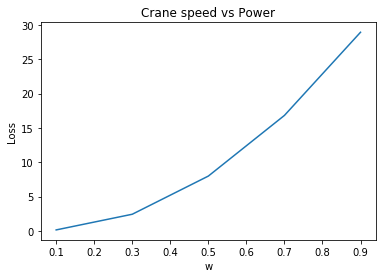

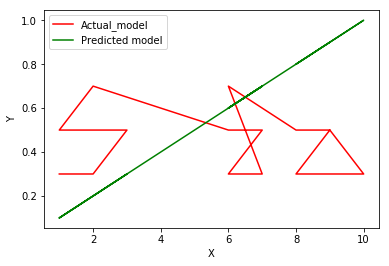

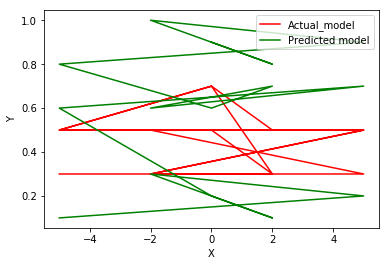

"\nComputation(crane_angle,crane_power)\nplt.plot(w_list,mse_list)\nplt.title('Crane angle vs Power')\nplt.ylabel('Loss')\nplt.xlabel('w')\nplt.show();\n"

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import the dataset into an object and output the head
#Save dataset in an object, makes it more scalable

#crane =pd.read_csv("/home/basic/Documents/Machine-learning/Pytorch-ML/Regression/Container_Crane_Controller_Data_Set.csv", sep=';')
crane_dataset = "/home/basic/Documents/Machine-learning/Pytorch-ML/Regression/Container_Crane_Controller_Data_Set.csv"
crane=pd.read_csv(crane_dataset,sep=';',decimal=',')
#print(crane.head())

#saving the attributes in python lists
crane_speed = crane['Speed']
crane_angle = crane['Angle']
crane_power = crane['Power']
crane_speed = crane_speed.tolist()
crane_angle = crane_angle.tolist()
y = crane_power = crane_power.tolist()


#print(crane_speed)
#print(crane_angle)
#print(crane_power)

#initialize data for regression
# = 0
mse_list = []
w_list = []
m = len(crane_angle)
y_pred = []

def Forward(x,w):
    return w*x

def Loss(x,y,w):
    y_pred = Forward(x,w)
    return (y_pred - y)**2

def Computation(x,y):
    for w in np.arange(0.1,1.1,0.2):
        print("w=", w)
        l_sum = 0
        for x_val, y_val in zip(x,y):  
            y_pred_val = Forward(x_val,w)
            l = Loss(x_val, y_val,w)
            l_sum += l
            print("\t", x_val, y_val, y_pred_val, l_sum)
        print("MSE=",l_sum/m)
        w_list.append(w)
        mse_list.append(l_sum/m)
    print(w_list)
    print(mse_list)

def Plot(x):
    min_error = mse_list.index(min(mse_list))
    w = w_list[min_error]
    y_pred = w*np.asarray(crane_speed)
    plt.plot(x,crane_power, label='Actual_model',color='red')
    plt.plot(x,y_pred,color='green', label='Predicted model')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show();
    
    
Computation(crane_speed,crane_power)
plt.plot(w_list,mse_list)
plt.title('Crane speed vs Power')
plt.ylabel('Loss')
plt.xlabel('w')
plt.show();
Plot(crane_speed)
Plot(crane_angle)


'''
Computation(crane_angle,crane_power)
plt.plot(w_list,mse_list)
plt.title('Crane angle vs Power')
plt.ylabel('Loss')
plt.xlabel('w')
plt.show();
'''


In [22]:
print(crane_speed)
print(crane_angle)
print(crane_power)
print(min(w_list))
print(mse_list)
print(y_pred)


[1, 2, 3, 1, 2, 6, 7, 6, 7, 6, 8, 9, 10, 8, 9]
[-5, 5, -2, 2, 0, -5, 5, -2, 2, 0, -5, 5, -2, 2, 0]
[0.3, 0.3, 0.5, 0.5, 0.7, 0.5, 0.5, 0.3, 0.3, 0.7, 0.5, 0.5, 0.3, 0.3, 0.5]
0.1
[0.13066666666666665, 2.4160000000000013, 7.981333333333339, 16.82666666666667, 28.952000000000005]
[]


In [10]:
print(min(mse_list))
min_error = mse_list.index(min(mse_list))
print(min_error)

0.13066666666666665
0
